# Load The Image Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/assignment_3_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

#Train Test Split

In [5]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
dataset_path = '/content/animals/animals'
output_path = '/content/splitted_animals'
animal_folders = os.listdir(dataset_path)
if not os.path.exists(output_path):
    os.makedirs(output_path)


for animal_folder in animal_folders:
    animal_folder_path = os.path.join(dataset_path, animal_folder)
    images = os.listdir(animal_folder_path)
    
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    train_animal_folder_path = os.path.join(output_path, 'train', animal_folder)
    test_animal_folder_path = os.path.join(output_path, 'test', animal_folder)
    os.makedirs(train_animal_folder_path, exist_ok=True)
    os.makedirs(test_animal_folder_path, exist_ok=True)
    
    for train_image in train_images:
        src_path = os.path.join(animal_folder_path, train_image)
        dest_path = os.path.join(train_animal_folder_path, train_image)
        shutil.copy(src_path, dest_path)
    
    for test_image in test_images:
        src_path = os.path.join(animal_folder_path, test_image)
        dest_path = os.path.join(test_animal_folder_path, test_image)
        shutil.copy(src_path, dest_path)


#1. Data Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
x_train=train_datagen.flow_from_directory("/content/splitted_animals/train",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 4320 images belonging to 90 classes.


In [10]:
x_test=test_datagen.flow_from_directory("/content/splitted_animals/test",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 1080 images belonging to 90 classes.


In [11]:
x_train.class_indices

{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

#2. Build the CNN Model

# CNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [13]:
model=Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Hidden Layers

In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [19]:
model.add(Dense(90,activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [46]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

<ipython-input-46-72bacc71fb19>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
180/180 [==============================] - 130s 723ms/step - loss: 3.2752 - accuracy: 0.2090 - val_loss: 3.6457 - val_accuracy: 0.1519
Epoch 2/10
180/180 [==============================] - 126s 700ms/step - loss: 3.0630 - accuracy: 0.2542 - val_loss: 3.4356 - val_accuracy: 0.1991
Epoch 3/10
180/180 [==============================] - 125s 694ms/step - loss: 2.8819 - accuracy: 0.2833 - val_loss: 3.5458 - val_accuracy: 0.1981
Epoch 4/10
180/180 [==============================] - 128s 709ms/step - loss: 2.7102 - accuracy: 0.3296 - val_loss: 3.4664 - val_accuracy: 0.1972
Epoch 5/10
180/180 [==============================] - 125s 697ms/step - loss: 2.5294 - accuracy: 0.3697 - val_loss: 3.5455 - val_accuracy: 0.2148
Epoch 6/10
180/180 [==============================] - 124s 689ms/step - loss: 2.3769 - accuracy: 0.3991 - val_loss: 3.4869 - val_accuracy: 0.2259
Epoch 7/10
180/180 [==============================] - 123s 686ms/step - loss: 2.2129 - accuracy: 0.4366 - val_loss: 3.4509 -

# Saving Model

In [49]:
model.save('animal_new.h5')

In [50]:
!tar -zcvf animalWeights.tgz animal_new.h5

animal_new.h5


#3. Testing the Model

In [51]:
#from tensorflow.keras import load_model
from keras import models
model = models.load_model('animal_new.h5')


In [76]:
from tensorflow.keras.utils import load_img, img_to_array 

test_image = load_img('/content/splitted_animals/test/butterfly/91cc6f8ef4.jpg', target_size = (64, 64))

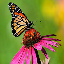

In [77]:
test_image

In [78]:
import numpy as np 
x = img_to_array(test_image)
x = np.expand_dims(x, axis =0)
x.shape

(1, 64, 64, 3)

In [80]:
pred = np.argmax(model.predict(x), axis = 1)
pred

1/1 [==============================] - 0s 33ms/step


array([8])

In [81]:
print(pred[0])

8


In [82]:
x_train.class_indices

{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

In [83]:
index = ['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',
 'zebra']



In [84]:
a = index[pred[0]]

In [85]:
print(a)

butterfly
